---
title: Main Notebook
authors:
  - Group 4
exports:
  - format: pdf
    output: pdf_builds/main.pdf
---

# Analyzing Housing Data

## Introduction

Understanding the factors that influence housing prices is a central problem in real estate analytics, urban planning, and financial decision-making. In this project, we analyze a comprehensive dataset of residential home sales from Ames, Iowa, originally compiled by Dean De Cock and widely used as a benchmark in predictive modeling. The dataset contains detailed information on the physical characteristics of each property, including structural attributes (such as overall material quality, number of rooms, and total living area), lot features, building type, utilities, basement and garage conditions, as well as sale timing and transaction details. The data is pubicly available on kaggle.

Our goal is to build a predictive model for SalePrice, the market value of each property, using the rich set of features provided. With more than 70 variables spanning numeric measurements, categorical classifications, and quality ratings, the dataset allows us to explore relationships between housing characteristics and price at a granular level. This also provides an opportunity to apply the full workflow of statistical learning: data cleaning, exploratory data analysis, feature engineering, model building, and evaluation.

## Assumptions About our Dataset

We are assuming that the data was collected with accuracy. Additionally, although there may be some measurement error, we are assuming that these errors are not systematically related to the sale price. Furthermore, we are assuming that each of the home sales are independent of each other. Since the data is observational, it is important to note that we cannot assume causality from our analysis. For logistic regression, we separated the sales prices into three categories (low/medium/high). We are assuming that these categories are a meaningful representation of the sale prices. 

## Load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

## Part 1: Exploratory Data Analysis

### Load and Inspect Data

First, we loaded the data. The data has already been separated into testing and training data for us. 

In [2]:
test = pd.read_csv('Part1-EDA/kaggledata/test.csv')
train = pd.read_csv('Part1-EDA/kaggledata/train.csv')

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.describe().T[['mean','std','min','25%','50%','75%','max']].head(15)

,mean,std,min,25%,50%,75%,max
Id,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### Cleaning the Dataset

In the Ames Housing dataset, many variables contain NA values, but these NAs do not represent missing or unobserved data. Instead, according to the data documentation, NA typically indicates that the house does not have that feature (e.g., no pool, no fireplace, no garage, no basement). Because these are structural NAs rather than true missingness, removing these variables would discard meaningful information about the property.

For example, features such as PoolQC, MiscFeature, Alley, Fence, and FireplaceQu have many NAs because most homes simply do not have those elements. Treating these as missing would be misleading; instead, they are encoded as a separate category “None”, which preserves the important distinction between “feature exists” and “feature does not exist.”

Similarly, basement- and garage-related variables (e.g., BsmtQual, BsmtCond, BsmtExposure, GarageType, GarageFinish) contain NA values only when the house has no basement or no garage. These NAs are not errors and should not cause the variable to be dropped. We therefore fill categorical basement/garage NAs with “None” and fill numeric areas (e.g., TotalBsmtSF, GarageArea) with 0, which correctly represents the absence of that space.

Only a small number of features contain true missing values. For instance, LotFrontage is missing for 259 observations; we impute these using the median LotFrontage within each Neighborhood, which respects neighborhood-level variation in lot characteristics. MasVnrType and MasVnrArea are imputed with “None” and 0 respectively, and the single missing value in Electrical is filled using the mode (“SBrkr”).

Overall, none of the variables are dropped, because the missingness is either meaningful (indicating absence of a feature) or minimal and easily imputed. Keeping all variables preserves predictive information and is consistent with best practices for this dataset.

We did however drop some of the outliers based on the IQR method. 

### Histogram of Sales Price

We created a histogram of the sales price to provide a visualization of the distribution. The distribution of the sale prices is slightly skewed right with most observations at around 150,000. 

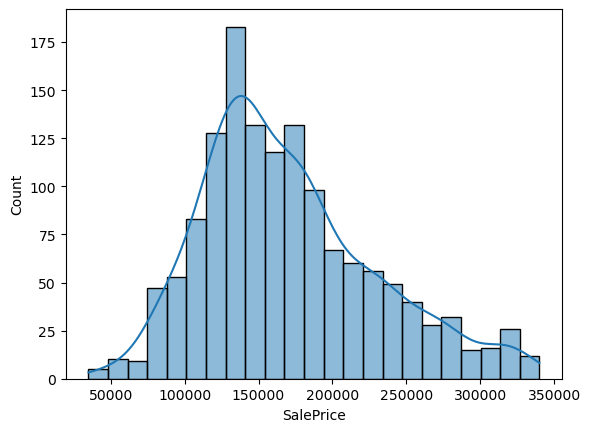

In [6]:
Image(filename = "Part1-EDA/Graph/adjustsaleprice.png")

### Correlation Analysis with Numeric Features

We then produced a correlation matrix to investigate the correlations between the covariates. 

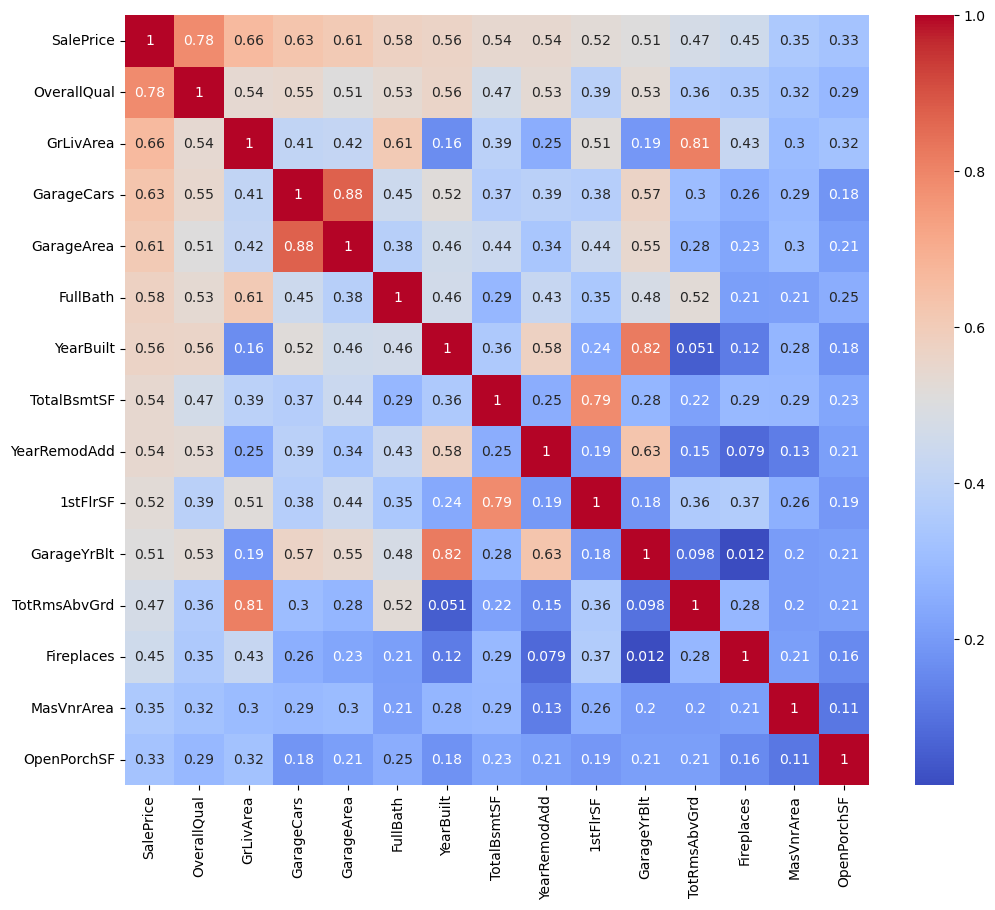

In [7]:
Image(filename = "Part1-EDA/Graph/feature_correlation_heatmap.png")

### Scatterplots for Key Numerical Predictors

In addition to our previous visualizations, we also created various scatterplots of the key numerical predictors. 

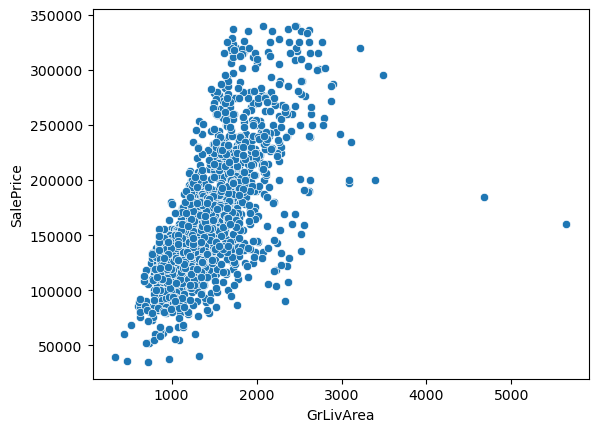

In [8]:
Image(filename = "Part1-EDA/Graph/GrLivArea_saleprice_corr.png")

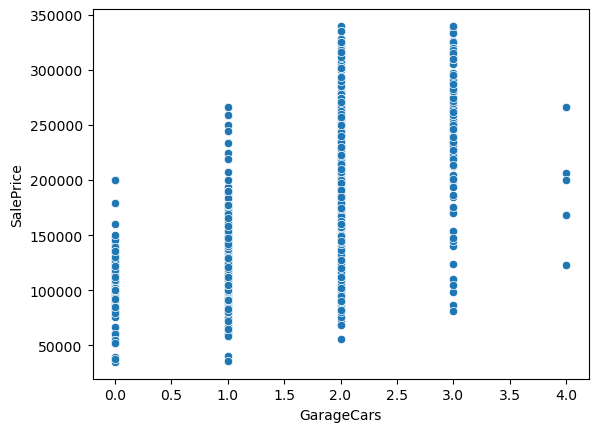

In [9]:
Image(filename = "Part1-EDA/Graph/GarageCars_saleprice_corr.png")

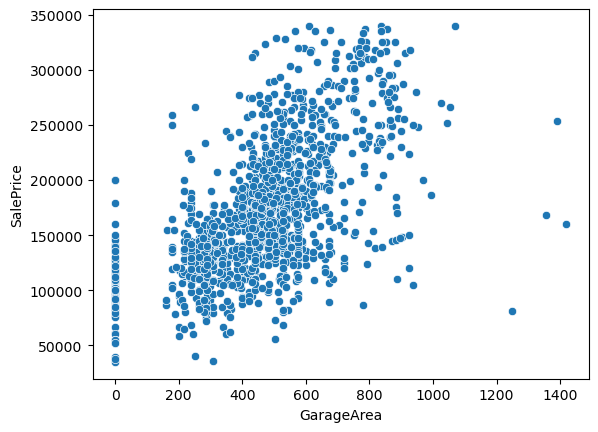

In [10]:
Image(filename = "Part1-EDA/Graph/GarageArea_saleprice_corr.png")

### Correlation Analysis with Categorical Features

We used the ANOVA F-test to rank categorical variables and find the top five categorical variable related to sale price. In order to conduct the ANOVA F-test we are assuming the following: the model is correctly specified, the errors are normally distributed, the errors have mean zero and a common variance, and the errors are independent across the observations. The top five variables were Neighborhood, ExterQual, KitchenQual, BsmtQual, and GarageFinish. We then created boxplots to visualize the sale price by these variables. For example, this is the boxplot for sale price by Neighborhood:

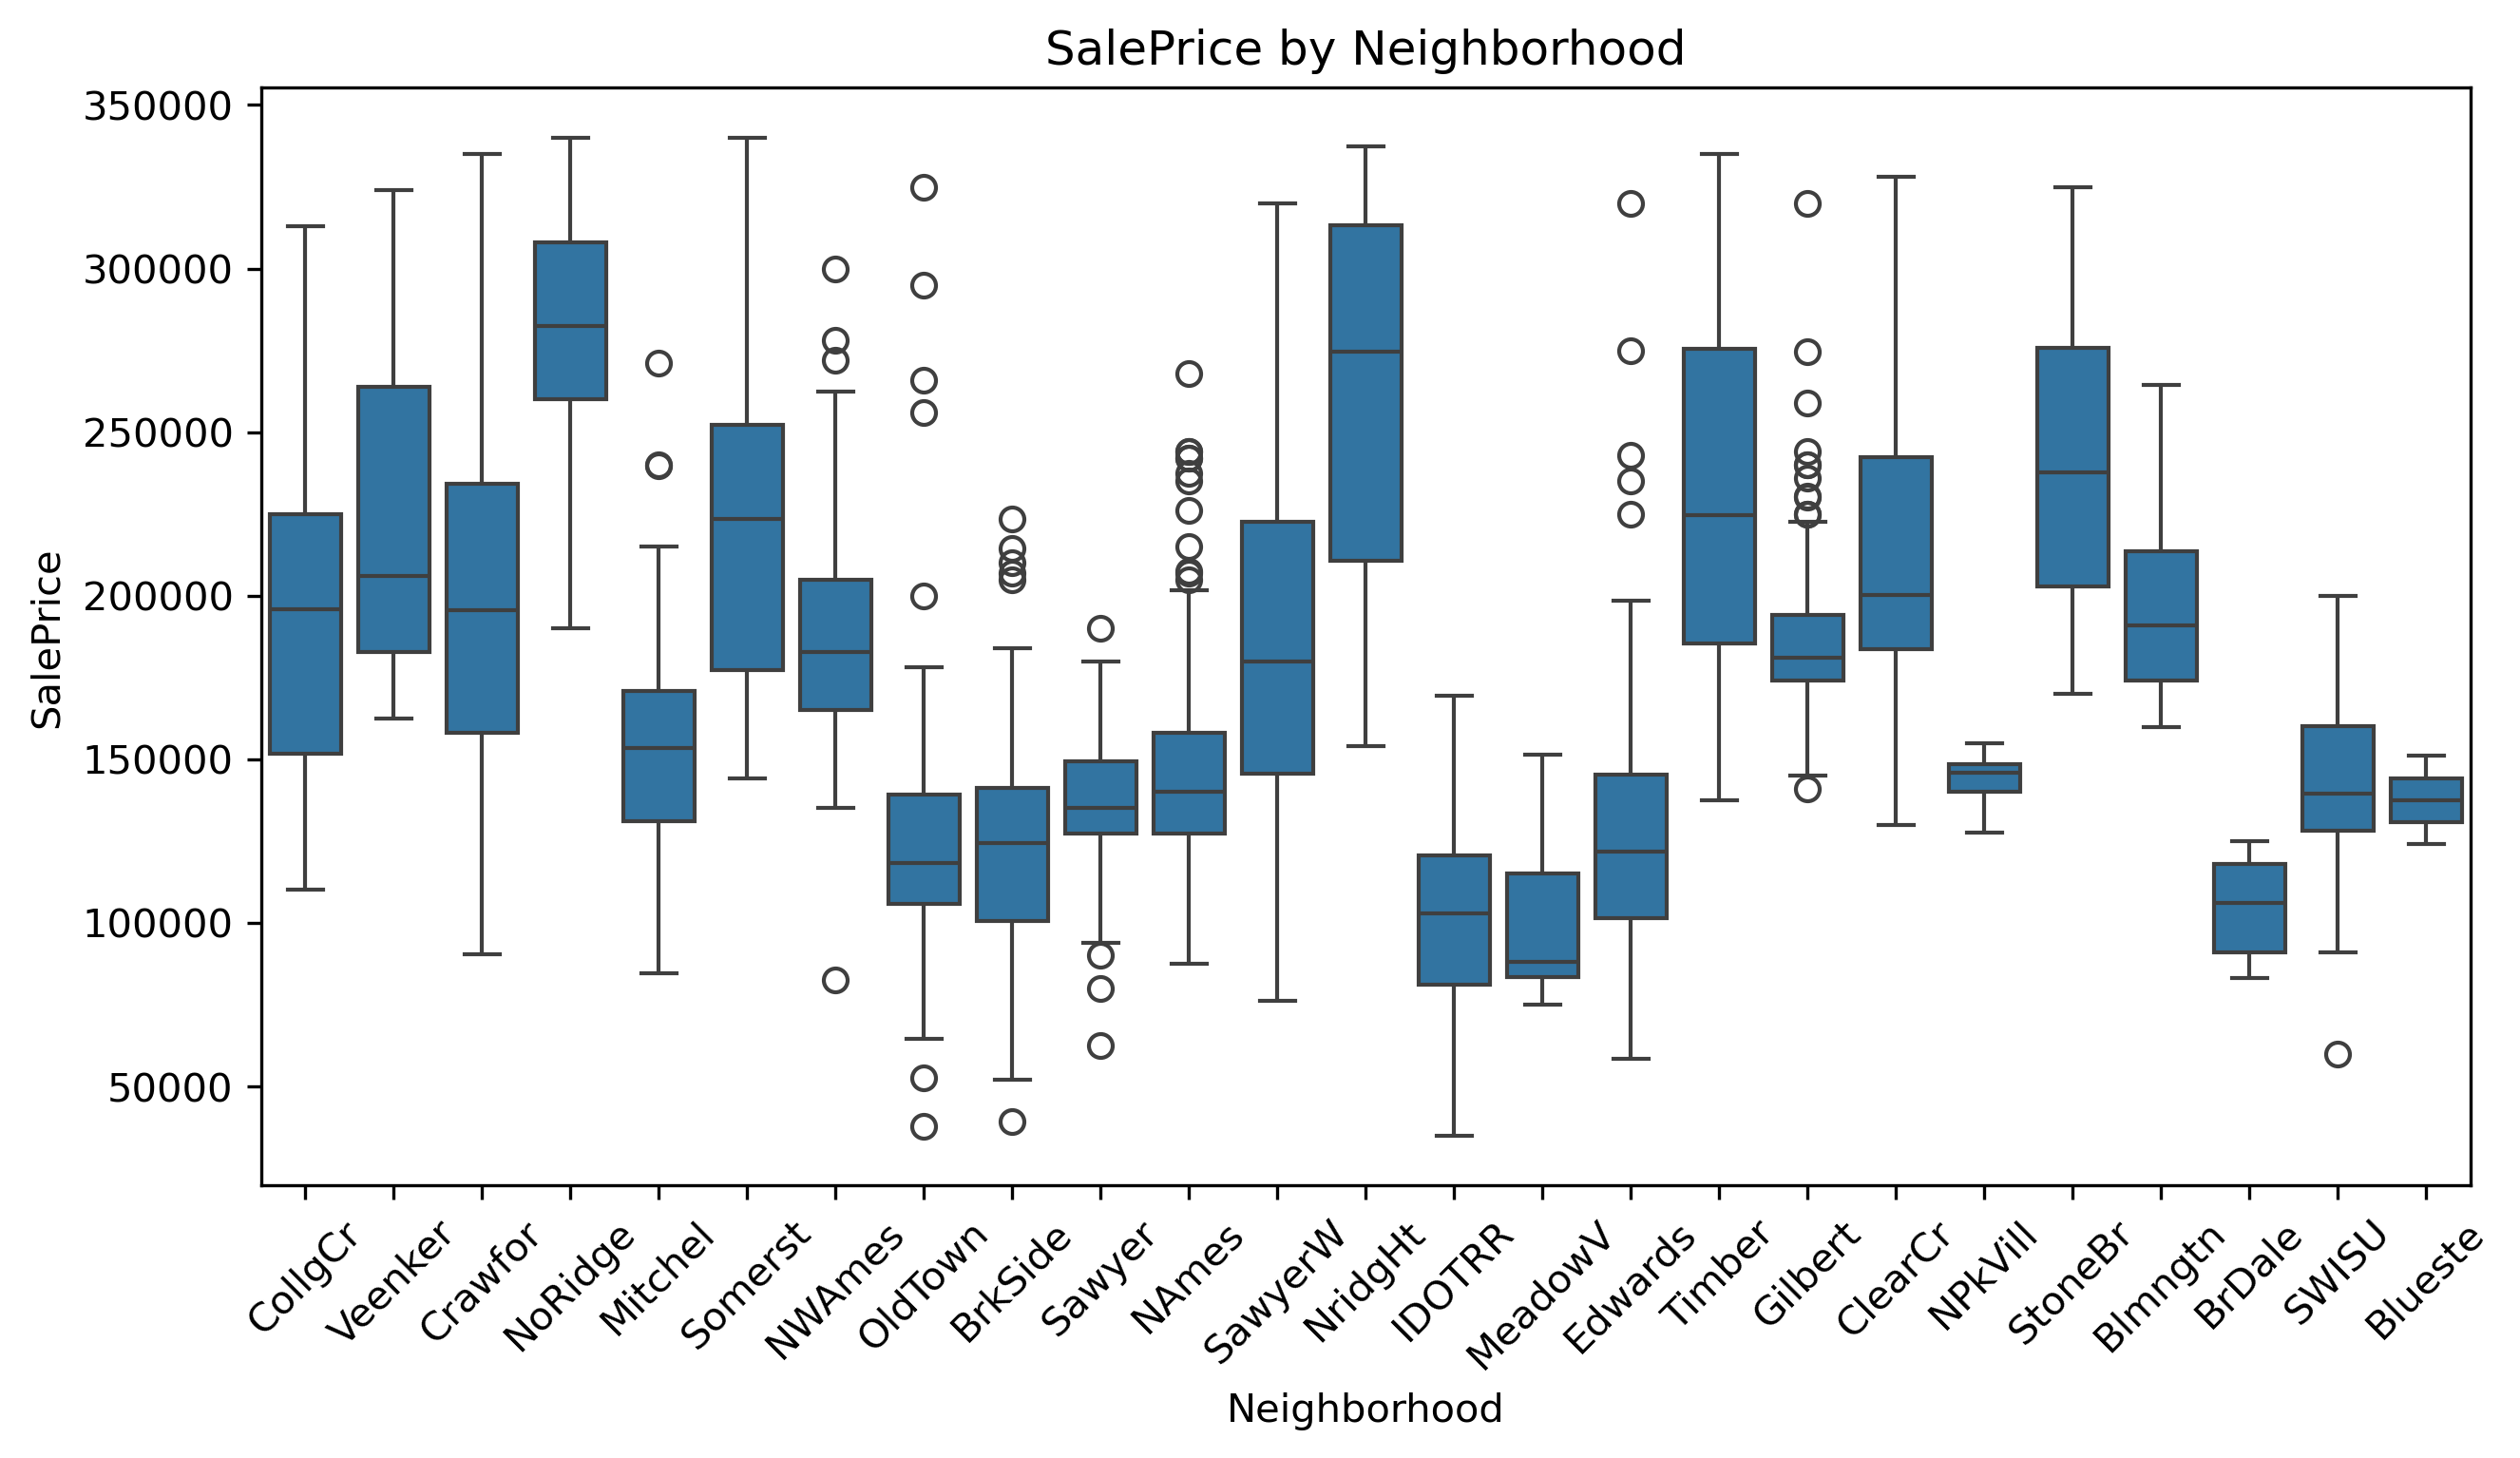

In [11]:
Image(filename = "Part1-EDA/Graph/saleprice_by_Neighborhood.png")

## Part 2: Prediction

In part 2, we build a classification model by converting SalePrice into price categories (e.g., low / mid / high). We then apply a machine learning approach using classifiers. 

### Inspect data

After converting sale price into categories, we created boxplots to look at the distribution between low, medium, and high sale prices. The distribution is well-balanced which means the classification task is well-suited for training and evaluation.

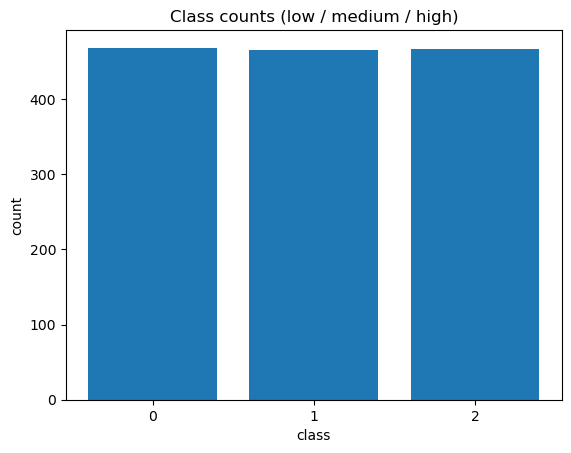

In [12]:
Image(filename = "Part2-Prediction/Graphs/class_distribution_counts.png")

### Cleaning the Data
The remaining NaN values appear in both categorical and numeric features. Since sklearn models cannot run with NaNs, we used reasonable two imputers: (1) categorical NaNs are filled with value “None”, (2) while numeric NaNs are filled with “0”.

### Train Models

We then trained the models using logistic regression and random forest. Since random forest achieves higher validation accuracy than logistic regression we used it for the predictions below. We also created a confusion matrix from the random forest. The confusion matrix compares true classes (i.e. the ground truth) to predicted classes and shows that most homes are classified correctly, with mistakes mainly between adjacent price groups.

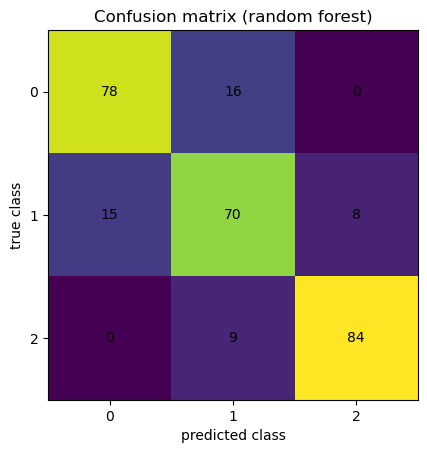

In [13]:
Image(filename = "Part2-Prediction/Graphs/confusion_matrix.png")

We compared the predicted classes to the training distribution. It ended up being pretty close! The predicted class distribution on the test set is reasonably balanced and consistent with the training data, suggesting no obvious distribution shift in predictions. This is as expected.

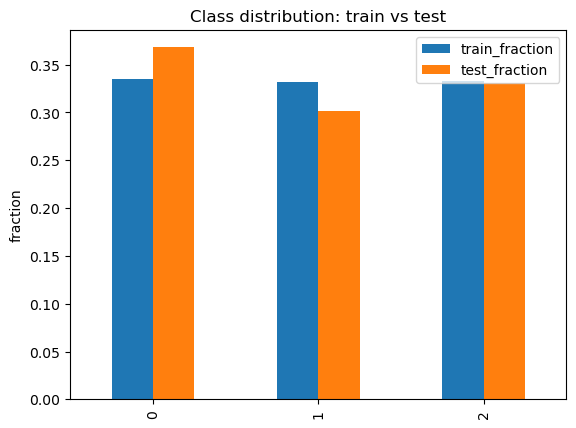

In [14]:
Image(filename = "Part2-Prediction/Graphs/class_distribution_train_vs_test.png")

### Most Predictive Features of Housing Prices

Lastly, we used our model from the random forest to display the top 20 most important covariates in predicting price category.

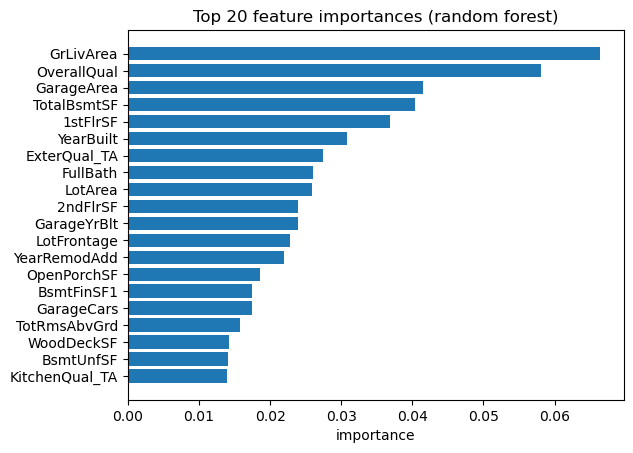

In [15]:
Image(filename = "Part2-Prediction/Graphs/top_20_rf_features.png")

Based on our results, the most important features for predicting price category are higher-quality construction, larger living areas, better garage and basement characteristics, and how new the home is. 

## Conclusion

The methods employed in our project can be used to address the question of which housing characteristics are most strongly correlated with sale price. We used both an ANOVA F-test and random forest to determine which covariates are most strongly related to sale price. The ANOVA F-test evaluates each feature independently and identifies variables whose mean values differ significantly across the sales price. In contrast, random forest reflects each variable’s contribution to predictive performance in a multivariate, nonlinear setting. As a result, the top-ranked covariates differ between the two methods. This discrepancy is expected, as the two methods capture different aspects of the relationship between housing characteristics and sale price. Notably, both methods included better garage and basement characteristics. 

Through our project, we were able to investigate what factors may influence sale price the most. Developing a deeper understanding of these relationships can help inform real estate analytics, urban planning, and financial decision-making, while also demonstrating the value of combining statistical tests with machine learning approaches.

# Author Contributions

Yvonne Ye: 
- `Part1-EDA`

Omair Gill: 
- `Part2-Prediction`

Kate Chung:
- `environment.yml`
- `Makefile`
- `README`
- `main` notebook

Elise Gao:
- building binder
- deploying website
- `pdf_builds`

Anything not mentioned in here was worked on collaboratively by all of the group members.